# Plotting Learning Curves and Checking Models’ Scalability

we show how to use the class LearningCurveDisplay to easily plot learning curves. In addition, we give an interpretation to the learning curves obtained for a naive Bayes and SVM classifiers.

Then, we explore and draw some conclusions about the scalability of these predictive models by looking at their computational cost and not only at their statistical accuracy.

Learning curve

Learning curves show the effect of adding more samples during the training process. The effect is depicted by checking the statistical performance of the model in terms of training score and testing score.

Here, we compute the learning curve of a naive Bayes classifier and a SVM classifier with a RBF kernel using the digits dataset.


# 1. Load and prepare data

In [54]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
import pandas as pd

X, y = load_digits(return_X_y=True)

In [55]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [57]:
pd.DataFrame(y).value_counts()

,count
0,
3,183
1,182
5,182
4,181
6,181
9,180
7,179
0,178
2,177


# 2. Model Instantiation

In [58]:
naive_bayes = GaussianNB()
svc = SVC(kernel="rbf", gamma=0.001)

# 3. Analyze and Visualize the learning curve



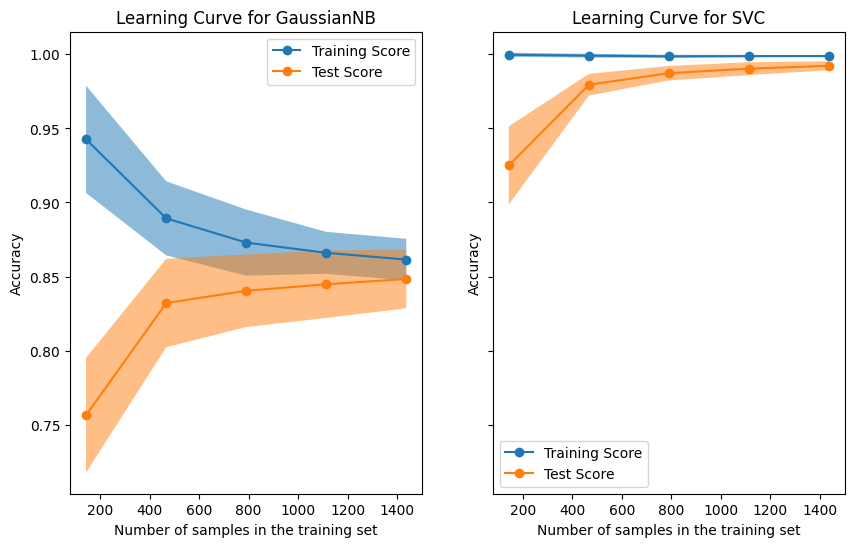

In [59]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

We first analyze the learning curve of the naive Bayes classifier. Its shape can be found in more complex datasets very often: the training score is very high when using few samples for training and decreases when increasing the number of samples, whereas the test score is very low at the beginning and then increases when adding samples. The training and test scores become more realistic when all the samples are used for training.

We see another typical learning curve for the SVM classifier with RBF kernel. The training score remains high regardless of the size of the training set. On the other hand, the test score increases with the size of the training dataset. Indeed, it increases up to a point where it reaches a plateau. Observing such a plateau is an indication that it might not be useful to acquire new data to train the model since the generalization performance of the model will not increase anymore.

# 4. Complexity analysis

it is also possible to look at the scalability of the predictive models in terms of training and scoring times.

Training Time refers to the time it takes for a machine learning model to learn patterns from the training data. This involves the model iteratively adjusting its parameters to minimize the error between its predictions and the actual values.

Scoring Time refers to the time it takes for a trained model to make predictions on new, unseen data. This typically involves feeding the input data to the model and calculating the output.

In [60]:
from sklearn.model_selection import learning_curve

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "n_jobs": 4,
    "return_times": True,
}

train_sizes, _, test_scores_nb, fit_times_nb, score_times_nb = learning_curve(
    naive_bayes, **common_params
)
train_sizes, _, test_scores_svm, fit_times_svm, score_times_svm = learning_curve(
    svc, **common_params
)

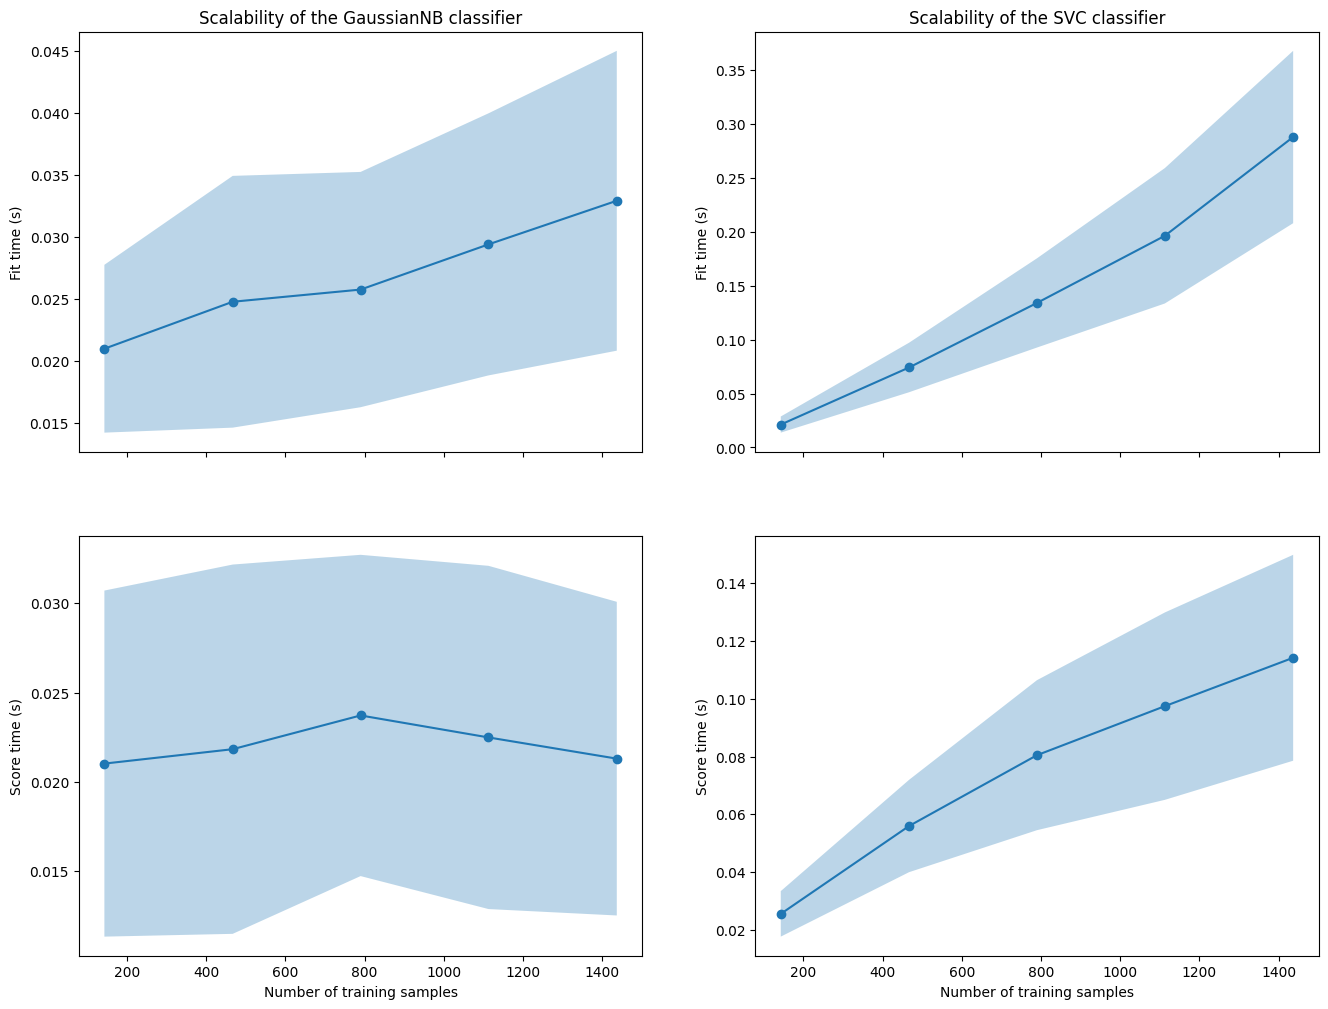

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True)

for ax_idx, (fit_times, score_times, estimator) in enumerate(
    zip(
        [fit_times_nb, fit_times_svm],
        [score_times_nb, score_times_svm],
        [naive_bayes, svc],
    )
):
    # scalability regarding the fit time
    ax[0, ax_idx].plot(train_sizes, fit_times.mean(axis=1), "o-")
    ax[0, ax_idx].fill_between(
        train_sizes,
        fit_times.mean(axis=1) - fit_times.std(axis=1),
        fit_times.mean(axis=1) + fit_times.std(axis=1),
        alpha=0.3,
    )
    ax[0, ax_idx].set_ylabel("Fit time (s)")
    ax[0, ax_idx].set_title(
        f"Scalability of the {estimator.__class__.__name__} classifier"
    )

    # scalability regarding the score time
    ax[1, ax_idx].plot(train_sizes, score_times.mean(axis=1), "o-")
    ax[1, ax_idx].fill_between(
        train_sizes,
        score_times.mean(axis=1) - score_times.std(axis=1),
        score_times.mean(axis=1) + score_times.std(axis=1),
        alpha=0.3,
    )
    ax[1, ax_idx].set_ylabel("Score time (s)")
    ax[1, ax_idx].set_xlabel("Number of training samples")

We see that the scalability of the SVM and naive Bayes classifiers is very different. The SVM classifier complexity at fit and score time increases rapidly with the number of samples. Indeed, it is known that the fit time complexity of this classifier is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a few 10,000 samples. In contrast, the naive Bayes classifier scales much better with a lower complexity at fit and score time.

# 5. Check the trade-off between increased training time and the cross-validation score

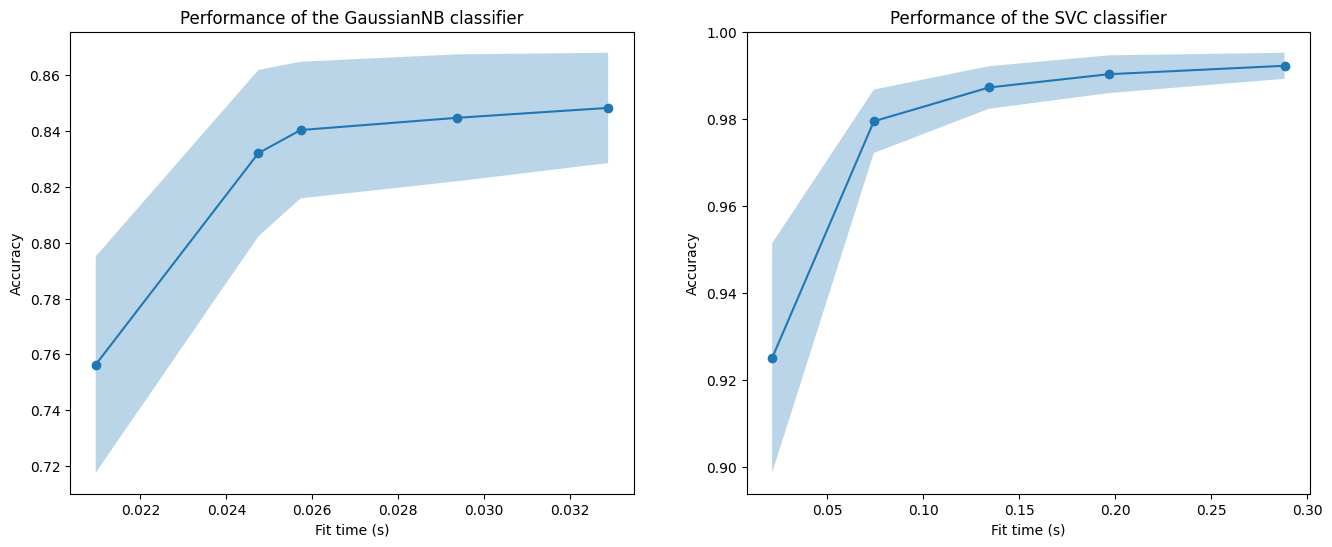

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

for ax_idx, (fit_times, test_scores, estimator) in enumerate(
    zip(
        [fit_times_nb, fit_times_svm],
        [test_scores_nb, test_scores_svm],
        [naive_bayes, svc],
    )
):
    ax[ax_idx].plot(fit_times.mean(axis=1), test_scores.mean(axis=1), "o-")
    ax[ax_idx].fill_between(
        fit_times.mean(axis=1),
        test_scores.mean(axis=1) - test_scores.std(axis=1),
        test_scores.mean(axis=1) + test_scores.std(axis=1),
        alpha=0.3,
    )
    ax[ax_idx].set_ylabel("Accuracy")
    ax[ax_idx].set_xlabel("Fit time (s)")
    ax[ax_idx].set_title(
        f"Performance of the {estimator.__class__.__name__} classifier"
    )

plt.show()

we can look for the inflection point for which the cross-validation score does not increase anymore and only the training time increases.